In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    roc_auc_score,
    precision_score,
    recall_score,
    RocCurveDisplay,
    accuracy_score
)

data = load_breast_cancer()
X = data.data
y = data.target

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target classes: {data.target_names}")



Features shape: (569, 30)
Target shape: (569,)
Target classes: ['malignant' 'benign']


In [10]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1] 

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[ 63   1]
 [  1 106]]


In [9]:
tn, fp, fn, tp = cm.ravel()
print(f"True Positive (TP): {tp}, False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}, True Negative (TN): {tn}")


True Positive (TP): 106, False Positive (FP): 1
False Negative (FN): 1, True Negative (TN): 63


In [8]:

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Accuracy: 0.9883
Precision: 0.9907
Recall: 0.9907


ROC-AUC Score: 0.9981


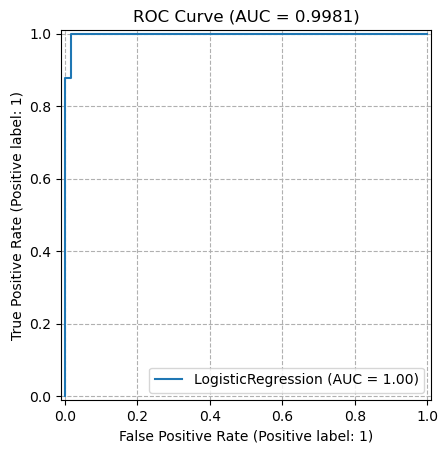

In [7]:

roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")


RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
plt.title(f'ROC Curve (AUC = {roc_auc:.4f})')
plt.grid(linestyle='--')



In [11]:

# Threshold Tuning Example
new_threshold = 0.3
y_pred_new_threshold = (y_proba >= new_threshold).astype(int)

# Recalculate metrics with the new threshold
precision_new = precision_score(y_test, y_pred_new_threshold)
recall_new = recall_score(y_test, y_pred_new_threshold)

print(f"Original Recall (Threshold 0.5): {recall:.4f}")
print(f"New Recall (Threshold {new_threshold}): {recall_new:.4f}")


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z_vals = np.linspace(-7, 7, 100)
sigma_vals = sigmoid(z_vals)


Original Recall (Threshold 0.5): 0.9907
New Recall (Threshold 0.3): 1.0000


<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\bulla\AppData\Local\Temp\ipykernel_78340\366889696.py:6: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sigma(z)$ (Probability)')


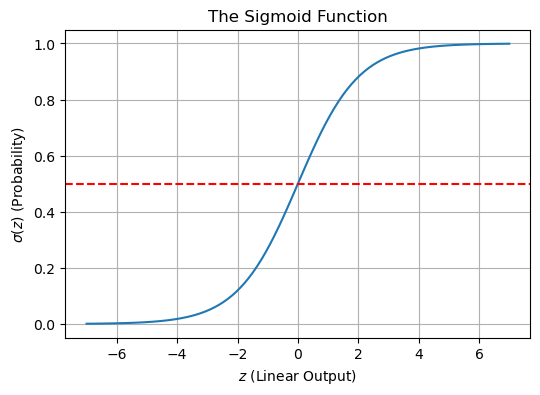

In [12]:
plt.figure(figsize=(6, 4))
plt.plot(z_vals, sigma_vals, label='Sigmoid Function')
plt.axhline(0.5, color='r', linestyle='--', label='Default Threshold (0.5)')
plt.title('The Sigmoid Function')
plt.xlabel('$z$ (Linear Output)')
plt.ylabel('$\sigma(z)$ (Probability)')
plt.grid(True)